In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Study data files
russia_alcohol = "Data/russia_alcohol.csv"
unemployment_data = "Data/unemployment_data.csv"
gdp_data= "Data/gdp.csv"
# Read CSV
alc_df = pd.read_csv(russia_alcohol)
unemp_df = pd.read_csv(unemployment_data)
gdp_df_read=pd.read_csv(gdp_data)
gdp_df=gdp_df_read.dropna()
gdp_df.columns=["date","GDP"]

alc_df.head(30)
print(gdp_df)

      date           GDP
1   1/1/99  1.959070e+11
2   1/1/00  2.597100e+11
3   1/1/01  3.066020e+11
4   1/1/02  3.454700e+11
5   1/1/03  4.303480e+11
6   1/1/04  5.910170e+11
7   1/1/05  7.640170e+11
8   1/1/06  9.899310e+11
9   1/1/07  1.299710e+12
10  1/1/08  1.660850e+12
11  1/1/09  1.222640e+12
12  1/1/10  1.524920e+12
13  1/1/11  2.045930e+12
14  1/1/12  2.208300e+12
15  1/1/13  2.292470e+12
16  1/1/14  2.059240e+12
17  1/1/15  1.363480e+12
18  1/1/16  1.276790e+12
19  1/1/17  1.574200e+12
20  1/1/18  1.657330e+12
21  1/1/19  1.693110e+12


In [31]:
# cleaning data
# renaming column and averaging months into year
# Study data files
clean_unemp = unemp_df.rename(columns={"LMUNRRTTRUM156S": "Max Unemployment Rate"})

clean_unemp = clean_unemp.groupby(pd.PeriodIndex(clean_unemp['DATE'], freq="Y"))['Max Unemployment Rate'].max()

# change null values to 0
print(alc_df.count())
clean_alc = alc_df.dropna()
print(alc_df.count())
# add in a total per region
clean_alc.loc[:,"Total"] = clean_alc.loc[:,"wine":"brandy"].sum(axis=1)
clean_alc

year         1615
region       1615
wine         1552
beer         1557
vodka        1554
champagne    1552
brandy       1549
dtype: int64
year         1615
region       1615
wine         1552
beer         1557
vodka        1554
champagne    1552
brandy       1549
dtype: int64


/var/folders/vl/20l4_0ts07bb1xtx5wc99wjm0000gn/T/ipykernel_11184/3518769660.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_alc.loc[:,"Total"] = clean_alc.loc[:,"wine":"brandy"].sum(axis=1)


,year,region,wine,beer,vodka,champagne,brandy,Total
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,14.5
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,35.0
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,41.7
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,27.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,31.4
...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,56.1
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,52.4
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,70.9
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,91.5


Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year')


Text(0, 0.5, 'Brandy')

<Figure size 640x480 with 0 Axes>

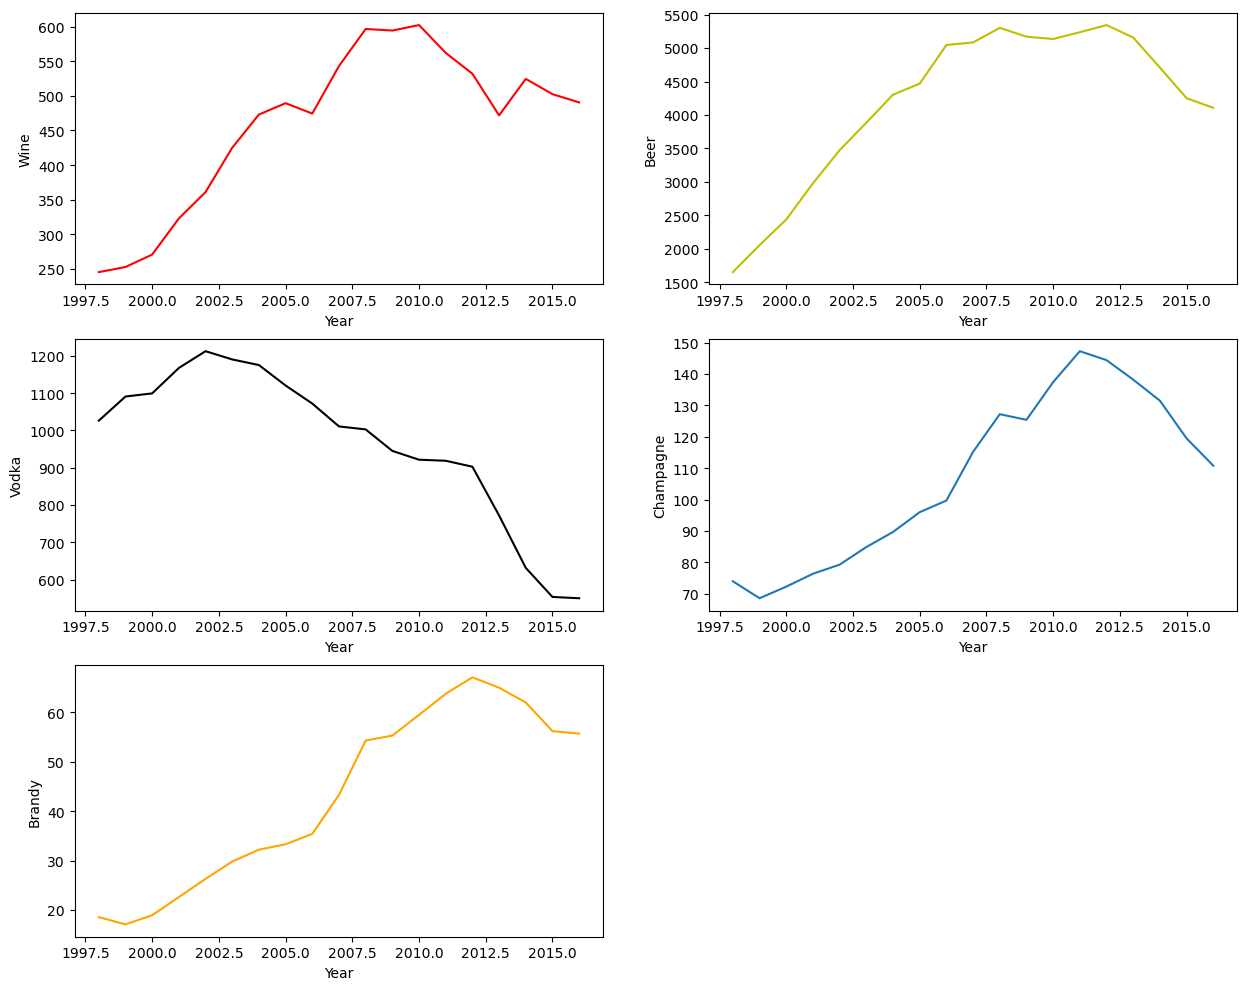

In [36]:
year_group=clean_alc.groupby(clean_alc["year"]).sum()
#year_group["GDP"]=gdp_df["GDP"]

#print(year_group)
#fig1, ax1 =plt.subplots()
#x_axis=list(map(str,year_group.index))
x_axis=year_group.index
print(x_axis)

#fig, ax = plt.subplots(3, 2, figsize = (5, 5))
#ax[0, 0].plot(year_group.index, year_group['wine']) #row 0, col 0 
#ax[0, 1].plot(year_group.index, year_group['beer'])
#ax[1, 0].plot(year_group.index, year_group['vodka'])
#ax[1, 1].plot(year_group.index, year_group['champagne'])
#ax[2, 0].plot(year_group.index, year_group['brandy'])
#plt.show()

fig = plt.figure()
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax1.plot(year_group.index, year_group['wine'], 'r') #row 0, col 0 
ax2.plot(year_group.index, year_group['beer'],'y')
ax3.plot(year_group.index, year_group['vodka'],'black')
ax4.plot(year_group.index, year_group['champagne'])
ax5.plot(year_group.index, year_group['brandy'],'orange')
ax1.set_xlabel('Year')   
ax1.set_ylabel('Wine') 
ax2.set_xlabel('Year')   
ax2.set_ylabel('Beer') 
ax3.set_xlabel('Year')   
ax3.set_ylabel('Vodka') 
ax4.set_xlabel('Year')   
ax4.set_ylabel('Champagne') 
ax5.set_xlabel('Year')   
ax5.set_ylabel('Brandy') 
